In [1]:
# connect to kaggle
!pip install kaggle -q


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\sanke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
!pip install nltk
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 9.9 MB/s eta 0:00:00
Using cached click-8.2.1-py3-none-any.whl (102 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\sanke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\sanke\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import os
import json
import zipfile
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
  

In [8]:
# load kaggle api credentials
kaggle_config = json.load(open('kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

# download the dataset

!kaggle datasets download -d notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0




  0%|          | 0.00/20.7M [00:00<?, ?B/s]
100%|██████████| 20.7M/20.7M [00:00<00:00, 682MB/s]


In [9]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 5E9A-0E1E

 Directory of c:\Users\sanke\OneDrive\Desktop\spotify_song_recommendation

08/22/2025  05:37 PM    <DIR>          .
08/22/2025  05:19 PM    <DIR>          ..
08/22/2025  05:32 PM             7,536 code.ipynb
08/22/2025  05:33 PM                69 kaggle.json
11/21/2022  05:49 PM        21,735,868 spotify-million-song-dataset.zip
               3 File(s)     21,743,473 bytes
               2 Dir(s)  298,729,512,960 bytes free


In [10]:
# unzip the dataset
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('spotify_data')

In [17]:
# loading the dataset into a pandas dataframe
df = pd.read_csv("spotify_data/spotify_millsongdata.csv")

In [21]:
df.shape  #get rows nd columsn

(57650, 4)

In [22]:
df.columns  # get column names

Index(['artist', 'song', 'link', 'text'], dtype='object')

In [20]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [27]:
# check for missing values
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [31]:
# Top Artists and Songs
top_artists = df['artist'].value_counts().head(10)
print("Top 10 Artists :",top_artists)

Top 10 Artists : artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [32]:
# sampling the data cuz its so huge.

df = df.sample(20000)
df.shape

(20000, 4)

In [33]:
# droping link clm as it is not useful.
df = df.drop ('link',axis=1).reset_index(drop=True)
df.head()

,artist,song,text
0,Avril Lavigne,Move Your Little Self On,I will move my little self on \r\nIt won't be...
1,Bread,Picture In Your Mind,Used to be my pleasure \r\nWhen I'd wake up i...
2,Green Day,Extraordinary Girl,She's an extraordinary girl \r\nIn an ordinar...
3,Uncle Tupelo,Sauget Wind,It's a long way to heaven \r\nIt's a short wa...
4,Linda Ronstadt,Keep Me From Blowing Away,Well I spent my whole lifetime \r\nIn a world...


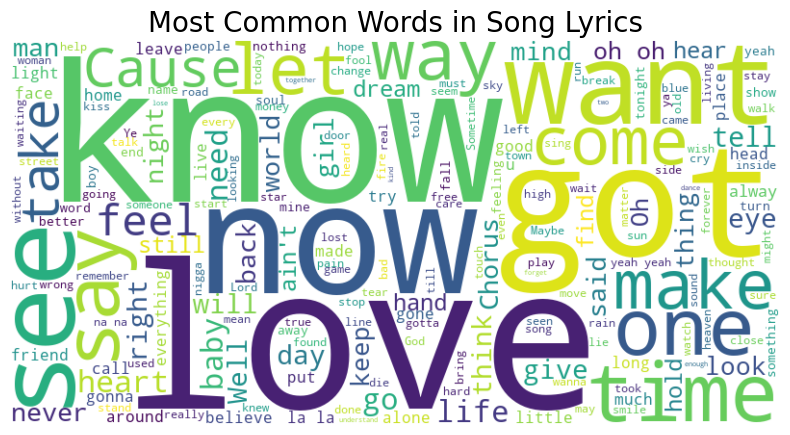

In [35]:
# WOrdCloud for song lyrics - plot the most common words in the lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')     
plt.axis('off')
plt.title('Most Common Words in Song Lyrics', fontsize=20)
plt.show()

In [48]:
# download nltk stopwords - words like is, am, are, the etc
nltk.download('punkt')    # for word tokenization
nltk.download('punkt_tab')  # for regex based tokenization
nltk.download('stopwords')  # for stopwords removal

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sanke\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
stop_words = set(stopwords.words('english') )
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [50]:
def preprocess_text(text):
    # removing speacial characters and numbers unsing regex
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # conver to lowercase
    text = text.lower()
    # tokenization and removing stopwords
    tokens = word_tokenize(text) # ['heart', 'beat', 'like', 'a', 'drum']
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)  # 'heart beat like drum'

In [52]:
# Apply the preprocessing function to the lyrics column
df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()


,artist,song,text,cleaned_text
0,Avril Lavigne,Move Your Little Self On,I will move my little self on \r\nIt won't be...,move little self wont much longer one day soon...
1,Bread,Picture In Your Mind,Used to be my pleasure \r\nWhen I'd wake up i...,used pleasure id wake morning open eyes see fi...
2,Green Day,Extraordinary Girl,She's an extraordinary girl \r\nIn an ordinar...,shes extraordinary girl ordinary world cant se...
3,Uncle Tupelo,Sauget Wind,It's a long way to heaven \r\nIt's a short wa...,long way heaven short way hell painkillers won...
4,Linda Ronstadt,Keep Me From Blowing Away,Well I spent my whole lifetime \r\nIn a world...,well spent whole lifetime world sunshine finds...


In [53]:
# vectorization using TF-IDF , Term Frequency - Inverse Document Frequency
# used to convert text data into numerical format

# each word is assigned a weight based on its frequency in a document relative to its frequency across all documents.
# and then compare the documents based on these weights.
# cosine similarity

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # limit to top 5000 features to reduce dimensionality
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])


In [54]:
# compute Cosine Similarity matrix

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [63]:
# Recommendation function

def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=6):
    # find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset."
    idx = idx[0]
    
# Get similarity scores for all songs with the given song
    sim_score = list(enumerate(cosine_sim[idx]))
# Sort the songs based on similarity scores
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
# Get the scores of the top_n most similar songs (excluding the first one which is the song itself)
    sim_score = sim_score[1:top_n+1] 
    
# Get the song indices
    song_indices = [i[0] for i in sim_score]
# Return the top_n most similar songs
    return df[['song', 'artist']].iloc[song_indices]    



In [64]:
# Test the recommendation function
recommend_songs("Extraordinary Girl")


,song,artist
9875,Athena,Who
18014,Girl Like Mine,Roy Orbison
16196,Bad Girl,ZZ Top
16819,She's A Girl And I'm A Man,Lloyd Cole
10215,Out Of Sync,Devo
5707,My Girl,Rod Stewart
